In [108]:
# Reset autoreload completely
try:
    %autoreload 0  # Disable autoreload
    %reload_ext autoreload
    %autoreload 2  # Re-enable with full reload
except:
    %load_ext autoreload
    %autoreload 2

from nirs4all.pipeline.runner import PipelineRunner
from nirs4all.pipeline.config import PipelineConfig
from nirs4all.dataset import dataset
from sample import dataset_config, pipeline_config
from nirs4all.dataset.loader import get_dataset
from nirs4all.controllers.registry import reset_registry
from nirs4all.controllers import *
from sklearn.preprocessing import MinMaxScaler, StandardScaler

data = get_dataset(dataset_config)
config = PipelineConfig(pipeline_config)
runner = PipelineRunner()
res_dataset, history, pipeline = runner.run(config, data)

print("✅ Simple transformers pipeline completed successfully!")
print(f"Final dataset: {res_dataset}")


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Loading dataset:
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
⚠️ Dataset does not have data for train_group.
⚠️ Dataset does not have data for test_group.
📊 Dataset: sample_data
Features (samples=189, sources=1):
- Source 0: (189, 1, 2151), processings=['raw'], min=-0.265, max=1.436, mean=0.466, var=0.149)
Targets: (samples=189, targets=1, processings=['numeric'])
- numeric: min=1.33, max=128.31, mean=30.779
Indexes:
- "train", ['raw']: 130 samples
- "test", ['raw']: 59 samples
🚀 Starting pipeline config_89f2f434 on dataset sample_data
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
🔄 Running 9 s

In [125]:
data = get_dataset(dataset_config)
config = PipelineConfig(pipeline_config)
runner = PipelineRunner()

pipeline_path = "results/sample_data/config_89f2f434"
pred_dataset, pred_context = PipelineRunner.predict(
    path=pipeline_path,
    dataset=data,  # Use same data for testing
    verbose=1
)
print("✅ Prediction mode completed successfully!")

predictions_obj = pred_dataset._predictions
pred_count = len(predictions_obj._predictions)
print(f"🎯 Generated {pred_count} prediction records")


Loading dataset:
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
⚠️ Dataset does not have data for train_group.
⚠️ Dataset does not have data for test_group.
📊 Dataset: sample_data
Features (samples=189, sources=1):
- Source 0: (189, 1, 2151), processings=['raw'], min=-0.265, max=1.436, mean=0.466, var=0.149)
Targets: (samples=189, targets=1, processings=['numeric'])
- numeric: min=1.33, max=128.31, mean=30.779
Indexes:
- "train", ['raw']: 130 samples
- "test", ['raw']: 59 samples
🔮 Starting prediction mode for pipeline on dataset sample_data
📦 Available binaries for 44 operations across 11 steps
🚀 Starting pipeline prediction_sample_data on dataset sample_data
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# 📊 Prediction Visualization Testing

Test the new `PredictionVisualizer` class for analyzing and displaying prediction results graphically.

🔍 Testing PredictionVisualizer with current prediction results...

🔍 PREDICTION SUMMARY REPORT

📊 Dataset: unknown
------------------------------
• Configurations: 1
• Models: 5 (PLSRegression_3, RandomForestRegressor_1, SVR_9, nicon_5, nicon_7)
• Total predictions: 5

🏆 Best Performance (by R²):
   unknown + PLSRegression_3: R²=-1.7980

🎯 Best Performance (by RMSE):
   unknown + PLSRegression_3: RMSE=37.5958


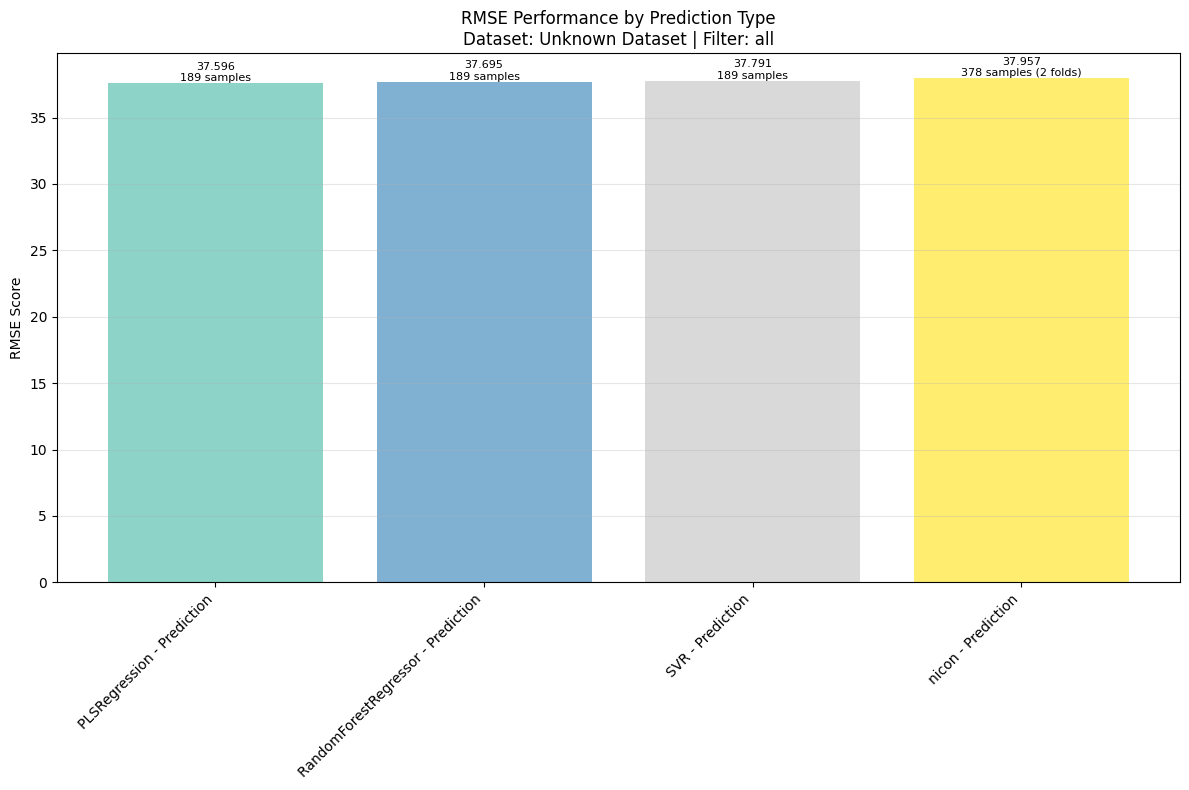

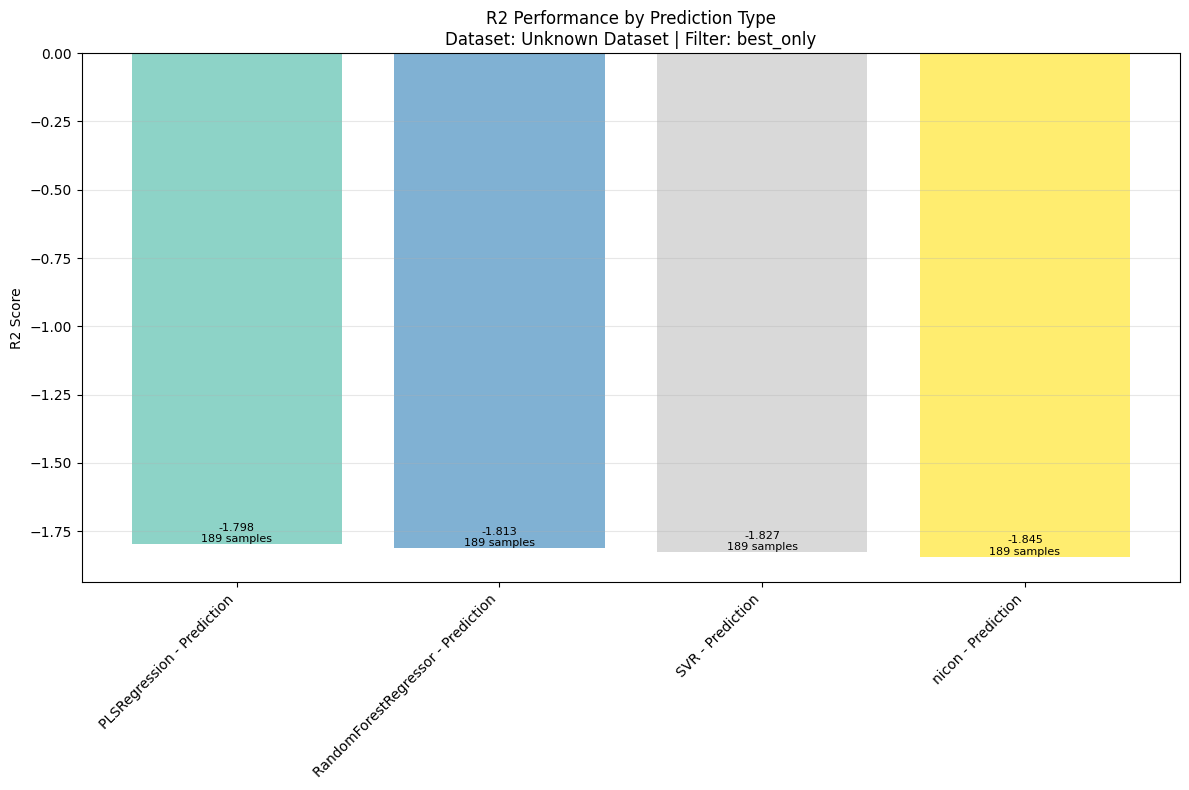

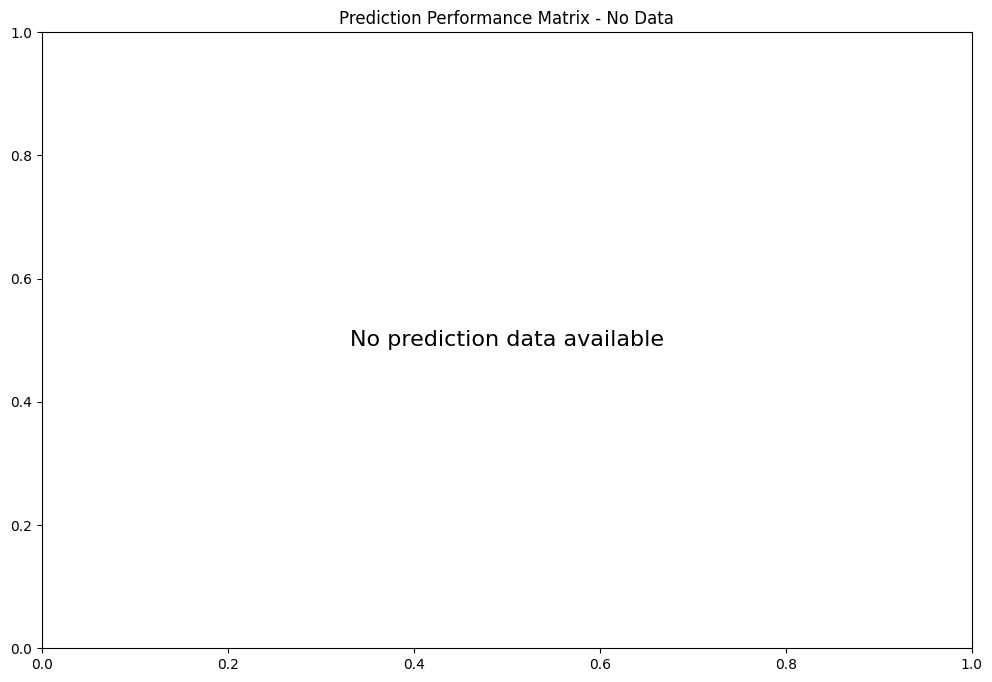

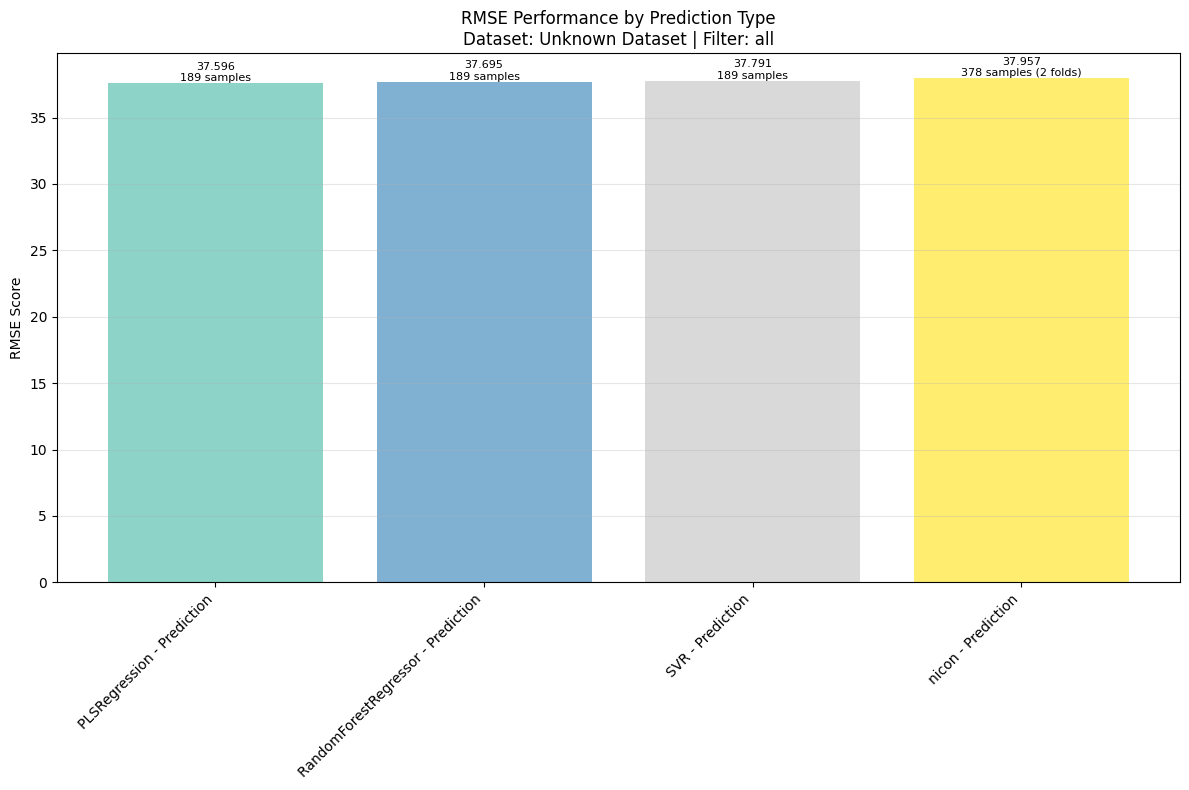

In [ ]:
# Import and test the PredictionVisualizer
from nirs4all.dataset.prediction_visualizer import PredictionVisualizer
import matplotlib.pyplot as plt

print("🔍 Testing PredictionVisualizer with current prediction results...")
viz = PredictionVisualizer(predictions_obj)
print("\n" + viz.summary_report())

# Show only best predictions
viz.plot_filtered_predictions(prediction_filter='best_only', metric='r2')

# Performance matrix with only global predictions
viz.plot_performance_matrix(prediction_filter='global_only')

# Bar chart comparing all prediction types
viz.plot_filtered_predictions(chart_type='bar', metric='rmse')

📈 Testing Performance Matrix...


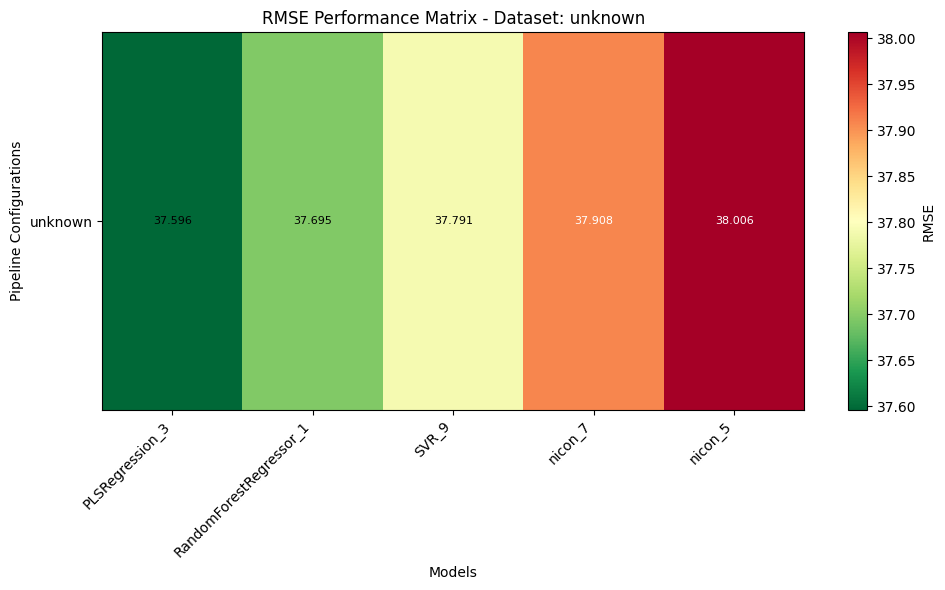

✅ Performance matrix plot created successfully!


In [ ]:
# Test 1: Performance Matrix Visualization
print("📈 Testing Performance Matrix...")

try:
    if 'viz' in globals():
        # Create performance matrix plot

        plt.show()
        print("✅ Performance matrix plot created successfully!")

    else:
        print("❌ Visualizer not initialized. Run previous cell first.")

except Exception as e:
    print(f"❌ Error creating performance matrix: {e}")
    import traceback
    traceback.print_exc()

📊 Testing Multi-Metric Comparison...



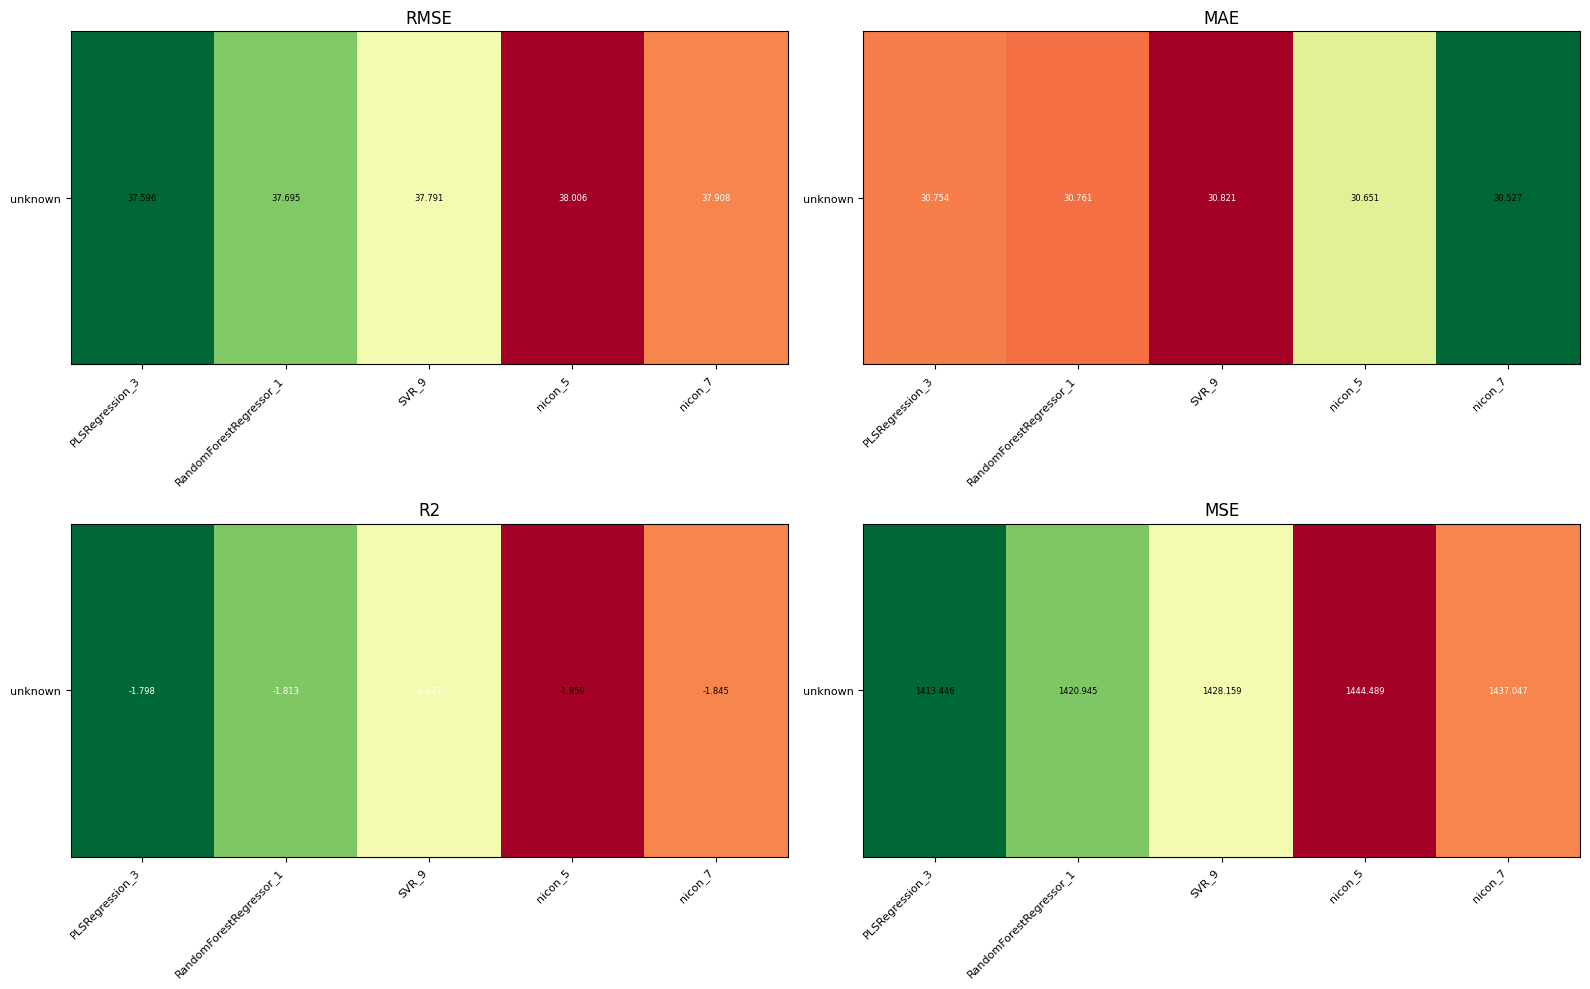

✅ Multi-metric comparison plot created successfully!


In [112]:
# Test 2: Multi-Metric Comparison
print("📊 Testing Multi-Metric Comparison...")

try:
    if 'viz' in globals():
        # Create multi-metric comparison plot
        fig2 = viz.plot_multi_metric_comparison(
            metrics=['rmse', 'mae', 'r2', 'mse'],  # Show all metrics
            sort_by='r2',      # Sort by R² (best first)
            ascending=False,   # Higher R² is better
            figsize=(16, 10)
        )

        plt.show()
        print("✅ Multi-metric comparison plot created successfully!")

    else:
        print("❌ Visualizer not initialized. Run previous cell first.")

except Exception as e:
    print(f"❌ Error creating multi-metric plot: {e}")
    import traceback
    traceback.print_exc()

🎯 Testing Prediction Scatter Plots...


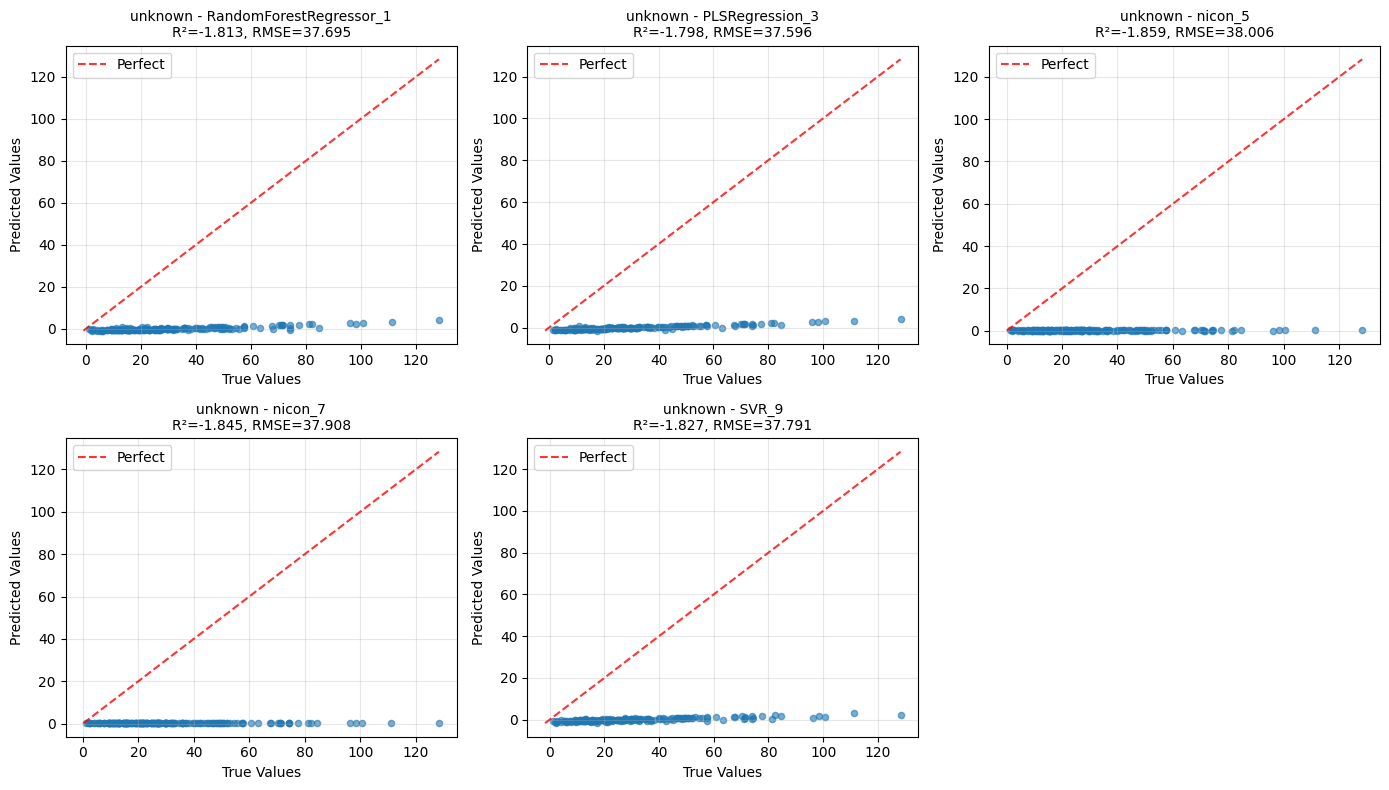

✅ Prediction scatter plots created successfully!


In [113]:
# Test 3: Prediction Scatter Plots
print("🎯 Testing Prediction Scatter Plots...")

try:
    if 'viz' in globals():
        # Create scatter plot of true vs predicted values
        fig3 = viz.plot_prediction_scatter(
            figsize=(14, 8)  # Show scatter plots for all model-config combinations
        )

        plt.show()
        print("✅ Prediction scatter plots created successfully!")

    else:
        print("❌ Visualizer not initialized. Run previous cell first.")

except Exception as e:
    print(f"❌ Error creating scatter plots: {e}")
    import traceback
    traceback.print_exc()

⚙️ Testing Advanced Visualization Options...

🔄 Creating performance matrix sorted by best config:


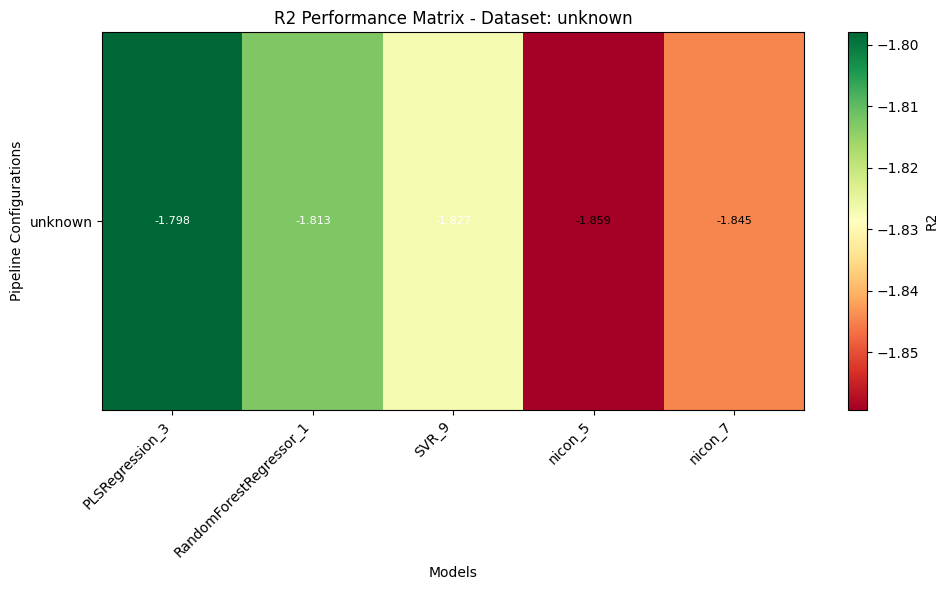


📈 Creating RMSE matrix sorted by model:


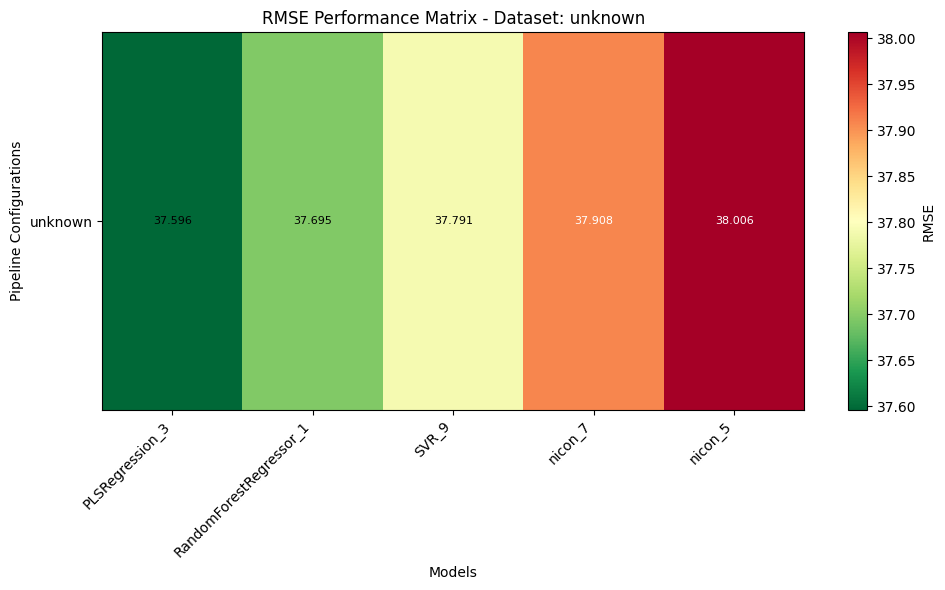

✅ Advanced visualization options tested successfully!


In [114]:
# Test 4: Demonstrate different sorting and filtering options
print("⚙️ Testing Advanced Visualization Options...")

try:
    if 'viz' in globals():
        # Test different sorting options
        print("\n🔄 Creating performance matrix sorted by best config:")
        fig4a = viz.plot_performance_matrix(
            metric='r2',         # Use R² metric
            sort_by='config',    # Sort by config performance
            ascending=False,     # Best (highest R²) first
            figsize=(10, 6),
            cmap='RdYlGn',      # Green is better for R²
            show_values=True
        )
        plt.show()

        print("\n📈 Creating RMSE matrix sorted by model:")
        fig4b = viz.plot_performance_matrix(
            metric='rmse',       # Use RMSE metric
            sort_by='model',     # Sort by model performance
            ascending=True,      # Best (lowest RMSE) first
            figsize=(10, 6),
            cmap='RdYlGn_r',    # Red is worse for RMSE
            show_values=True
        )
        plt.show()

        print("✅ Advanced visualization options tested successfully!")

    else:
        print("❌ Visualizer not initialized. Run previous cell first.")

except Exception as e:
    print(f"❌ Error in advanced visualization: {e}")
    import traceback
    traceback.print_exc()

In [115]:
# Debug: Explore dictionary structure
print("🔍 Exploring prediction dictionary structure...")

try:
    if 'pred_dataset' in globals() and hasattr(pred_dataset, '_predictions'):
        predictions_obj = pred_dataset._predictions
        pred_data = predictions_obj._predictions

        print(f"Dictionary keys: {list(pred_data.keys())}")

        # Explore each key
        for key, value in pred_data.items():
            print(f"\nKey: {key}")
            print(f"  Type: {type(value)}")
            if hasattr(value, '__len__'):
                print(f"  Length: {len(value)}")

            # Show first few items or structure
            if isinstance(value, (list, tuple)) and len(value) > 0:
                print(f"  First item type: {type(value[0])}")
                print(f"  First item: {value[0]}")
            elif isinstance(value, dict):
                print(f"  Dict keys: {list(value.keys())}")
                for subkey, subvalue in list(value.items())[:2]:  # Show first 2 items
                    print(f"    {subkey}: {type(subvalue)} = {subvalue}")
            else:
                print(f"  Value: {value}")

        # Try the get_predictions method
        print(f"\n🔍 Trying get_predictions():")
        try:
            preds = predictions_obj.get_predictions()
            print(f"get_predictions() type: {type(preds)}")
            if isinstance(preds, dict):
                print(f"Keys: {list(preds.keys())}")
                for key, value in list(preds.items())[:2]:
                    print(f"  {key}: {type(value)}")
                    if isinstance(value, dict):
                        print(f"    Sub-keys: {list(value.keys())}")
            elif isinstance(preds, list):
                print(f"List length: {len(preds)}")
                if preds:
                    print(f"First item: {preds[0]}")
        except Exception as e:
            print(f"get_predictions() error: {e}")

except Exception as e:
    print(f"❌ Error exploring structure: {e}")
    import traceback
    traceback.print_exc()

🔍 Exploring prediction dictionary structure...
Dictionary keys: ['unknown_unknown_RandomForestRegressor_1_prediction', 'unknown_unknown_PLSRegression_3_prediction', 'unknown_unknown_nicon_5_prediction', 'unknown_unknown_nicon_7_prediction', 'unknown_unknown_SVR_9_prediction']

Key: unknown_unknown_RandomForestRegressor_1_prediction
  Type: <class 'dict'>
  Length: 9
  Dict keys: ['dataset', 'pipeline', 'model', 'partition', 'y_true', 'y_pred', 'sample_indices', 'fold_idx', 'metadata']
    dataset: <class 'str'> = unknown
    pipeline: <class 'str'> = unknown

Key: unknown_unknown_PLSRegression_3_prediction
  Type: <class 'dict'>
  Length: 9
  Dict keys: ['dataset', 'pipeline', 'model', 'partition', 'y_true', 'y_pred', 'sample_indices', 'fold_idx', 'metadata']
    dataset: <class 'str'> = unknown
    pipeline: <class 'str'> = unknown

Key: unknown_unknown_nicon_5_prediction
  Type: <class 'dict'>
  Length: 9
  Dict keys: ['dataset', 'pipeline', 'model', 'partition', 'y_true', 'y_pred', 

In [117]:
# Enhanced Cross-Validation Prediction Analysis
print("🎯 CROSS-VALIDATION PREDICTION ANALYSIS")
print("=" * 55)

import numpy as np
import re
from collections import defaultdict

def analyze_cv_predictions(predictions_obj):
    """Analyze cross-validation predictions by grouping fold results properly"""

    # Group predictions by base model name and partition type
    model_groups = defaultdict(lambda: defaultdict(list))

    for key, pred_data in predictions_obj._predictions.items():
        model_name = pred_data['model']
        partition = pred_data['partition']

        # Extract base model name (everything before the last underscore + number)
        base_model_match = re.match(r'(.+?)_\d+$', model_name)
        base_model = base_model_match.group(1) if base_model_match else model_name

        # Categorize partition types
        if 'test_fold' in partition:
            partition_type = 'Fold Test'
        elif 'val_fold' in partition:
            partition_type = 'Fold Validation'
        elif 'train_fold' in partition:
            partition_type = 'Fold Train'
        elif 'test' in partition and 'fold' not in partition:
            partition_type = 'Global Test'
        elif 'global_train' in partition:
            partition_type = 'Global Train'
        else:
            partition_type = partition

        model_groups[base_model][partition_type].append({
            'model_instance': model_name,
            'partition': partition,
            'data': pred_data,
            'fold_idx': pred_data.get('fold_idx', 0)
        })

    return model_groups

if 'cv_result' in globals() and hasattr(cv_result, '_predictions'):
    print("📊 Analyzing Cross-Validation Results...")
    print(f"Total prediction records: {len(cv_result._predictions)}")

    # Analyze CV predictions
    cv_analysis = analyze_cv_predictions(cv_result._predictions)

    print(f"Base models found: {list(cv_analysis.keys())}")
    print()

    for base_model, prediction_types in cv_analysis.items():
        print(f"🤖 Base Model: {base_model}")
        print("─" * 50)

        for pred_type, predictions in prediction_types.items():
            print(f"  📈 {pred_type}:")

            if len(predictions) == 1:
                # Single prediction
                pred = predictions[0]
                data = pred['data']
                y_true = np.array(data['y_true']).flatten()
                y_pred = np.array(data['y_pred']).flatten()

                # Calculate metrics
                rmse = np.sqrt(np.mean((y_true - y_pred) ** 2))
                r2 = 1 - (np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2))
                mae = np.mean(np.abs(y_true - y_pred))

                print(f"    ✅ {len(y_true)} samples")
                print(f"    📊 RMSE: {rmse:.4f}, R²: {r2:.4f}, MAE: {mae:.4f}")
                print(f"    🎯 Model Instance: {pred['model_instance']}")

            else:
                # Multiple fold predictions
                print(f"    ✅ {len(predictions)} fold predictions:")

                all_rmse = []
                all_r2 = []
                all_samples = 0

                for pred in sorted(predictions, key=lambda x: x['fold_idx']):
                    data = pred['data']
                    y_true = np.array(data['y_true']).flatten()
                    y_pred = np.array(data['y_pred']).flatten()

                    rmse = np.sqrt(np.mean((y_true - y_pred) ** 2))
                    r2 = 1 - (np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2))

                    all_rmse.append(rmse)
                    all_r2.append(r2)
                    all_samples += len(y_true)

                    fold_info = pred['partition'].split('_')[-1] if '_' in pred['partition'] else pred['fold_idx']
                    print(f"      Fold {fold_info}: {len(y_true)} samples, RMSE={rmse:.4f}, R²={r2:.4f}")
                    print(f"        Instance: {pred['model_instance']}")

                # Show aggregate statistics
                print(f"    📊 Aggregate: {all_samples} total samples")
                print(f"    📈 Average Performance: RMSE={np.mean(all_rmse):.4f}±{np.std(all_rmse):.4f}")
                print(f"                           R²={np.mean(all_r2):.4f}±{np.std(all_r2):.4f}")

            print()

    # Now test combining fold predictions properly
    print("=" * 55)
    print("🧮 TESTING FOLD COMBINATION")
    print("=" * 55)

    # Get base model name for combination
    base_models = list(cv_analysis.keys())
    if base_models:
        test_base_model = base_models[0]
        print(f"Testing fold combination for: {test_base_model}")

        # Find all test fold predictions for this base model
        test_folds = cv_analysis[test_base_model].get('Fold Test', [])

        if test_folds:
            print(f"Found {len(test_folds)} test fold predictions to combine")

            # Combine manually since each fold has different sample indices
            combined_y_true = []
            combined_y_pred = []
            combined_indices = []

            for fold_pred in test_folds:
                data = fold_pred['data']
                combined_y_true.extend(data['y_true'])
                combined_y_pred.extend(data['y_pred'])
                combined_indices.extend(data.get('sample_indices', []))

            combined_y_true = np.array(combined_y_true)
            combined_y_pred = np.array(combined_y_pred)

            # Calculate combined performance
            combined_rmse = np.sqrt(np.mean((combined_y_true - combined_y_pred) ** 2))
            combined_r2 = 1 - (np.sum((combined_y_true - combined_y_pred) ** 2) /
                              np.sum((combined_y_true - np.mean(combined_y_true)) ** 2))

            print(f"✅ Successfully combined fold predictions:")
            print(f"   📊 Total samples: {len(combined_y_true)}")
            print(f"   📈 Combined RMSE: {combined_rmse:.4f}")
            print(f"   📈 Combined R²: {combined_r2:.4f}")

        else:
            print("⚠️ No test fold predictions found for combination")

else:
    print("❌ No cross-validation results available")
    print("   Please run a cross-validation pipeline first to see comprehensive prediction analysis")

🎯 CROSS-VALIDATION PREDICTION ANALYSIS
📊 Analyzing Cross-Validation Results...
Total prediction records: 4
Base models found: ['RandomForestRegressor']

🤖 Base Model: RandomForestRegressor
──────────────────────────────────────────────────
  📈 Global Test:
    ✅ 44 samples
    📊 RMSE: 4.6206, R²: 0.9530, MAE: 3.8396
    🎯 Model Instance: RandomForestRegressor_1

  📈 Fold Test:
    ✅ 3 fold predictions:
      Fold 0: 44 samples, RMSE=21.1412, R²=0.0167
        Instance: RandomForestRegressor_4
      Fold 1: 43 samples, RMSE=31.3401, R²=-0.2147
        Instance: RandomForestRegressor_7
      Fold 2: 43 samples, RMSE=23.2542, R²=-0.3435
        Instance: RandomForestRegressor_10
    📊 Aggregate: 130 total samples
    📈 Average Performance: RMSE=25.2452±4.3952
                           R²=-0.1805±0.1490

🧮 TESTING FOLD COMBINATION
Testing fold combination for: RandomForestRegressor
Found 3 test fold predictions to combine
✅ Successfully combined fold predictions:
   📊 Total samples: 130
 

In [ ]:
# Enhanced Prediction Visualizer with Filtering
print("🎯 ENHANCED PREDICTION VISUALIZATION WITH FILTERING")
print("=" * 60)

try:
    if 'pred_dataset' in globals() and hasattr(pred_dataset, '_predictions'):
        # Create enhanced visualizer with dataset name override
        dataset_name = getattr(pred_dataset, 'name', 'Sample NIRS Dataset')
        viz_enhanced = PredictionVisualizer(pred_dataset._predictions, dataset_name_override=dataset_name)

        print(f"✅ Enhanced visualizer created with dataset: {dataset_name}")
        print(f"📊 Total prediction records: {len(viz_enhanced.data)}")

        # Test different filter types
        filter_types = ['all', 'best_only', 'folds_only', 'averaged_only', 'global_only']

        for filter_type in filter_types:
            print(f"\n🔍 Testing filter: {filter_type}")

            # Get filtered data count
            filtered_data = viz_enhanced._filter_data_by_prediction_types(filter_type)
            print(f"   📈 Filtered to {len(filtered_data)} records")

            if len(filtered_data) > 0:
                # Show sample of what's included
                sample_partitions = [pred.get('partition', 'unknown') for pred in filtered_data[:3]]
                print(f"   🎯 Sample partitions: {sample_partitions}")

        print(f"\n✅ All filters tested successfully!")

    else:
        print("❌ No prediction data found. Run the prediction cell first!")

except Exception as e:
    print(f"❌ Error testing enhanced visualizer: {e}")
    import traceback
    traceback.print_exc()

🎯 ENHANCED PREDICTION VISUALIZATION WITH FILTERING
✅ Enhanced visualizer created with dataset: sample_data
📊 Total prediction records: 5

🔍 Testing filter: all
   📈 Filtered to 5 records
   🎯 Sample partitions: ['prediction', 'prediction', 'prediction']

🔍 Testing filter: best_only
   📈 Filtered to 4 records
   🎯 Sample partitions: ['prediction', 'prediction', 'prediction']

🔍 Testing filter: folds_only
   📈 Filtered to 0 records

🔍 Testing filter: averaged_only
   📈 Filtered to 0 records

🔍 Testing filter: global_only
   📈 Filtered to 0 records

✅ All filters tested successfully!


🎨 TESTING FILTERED VISUALIZATIONS

📊 1. All Predictions Bar Chart


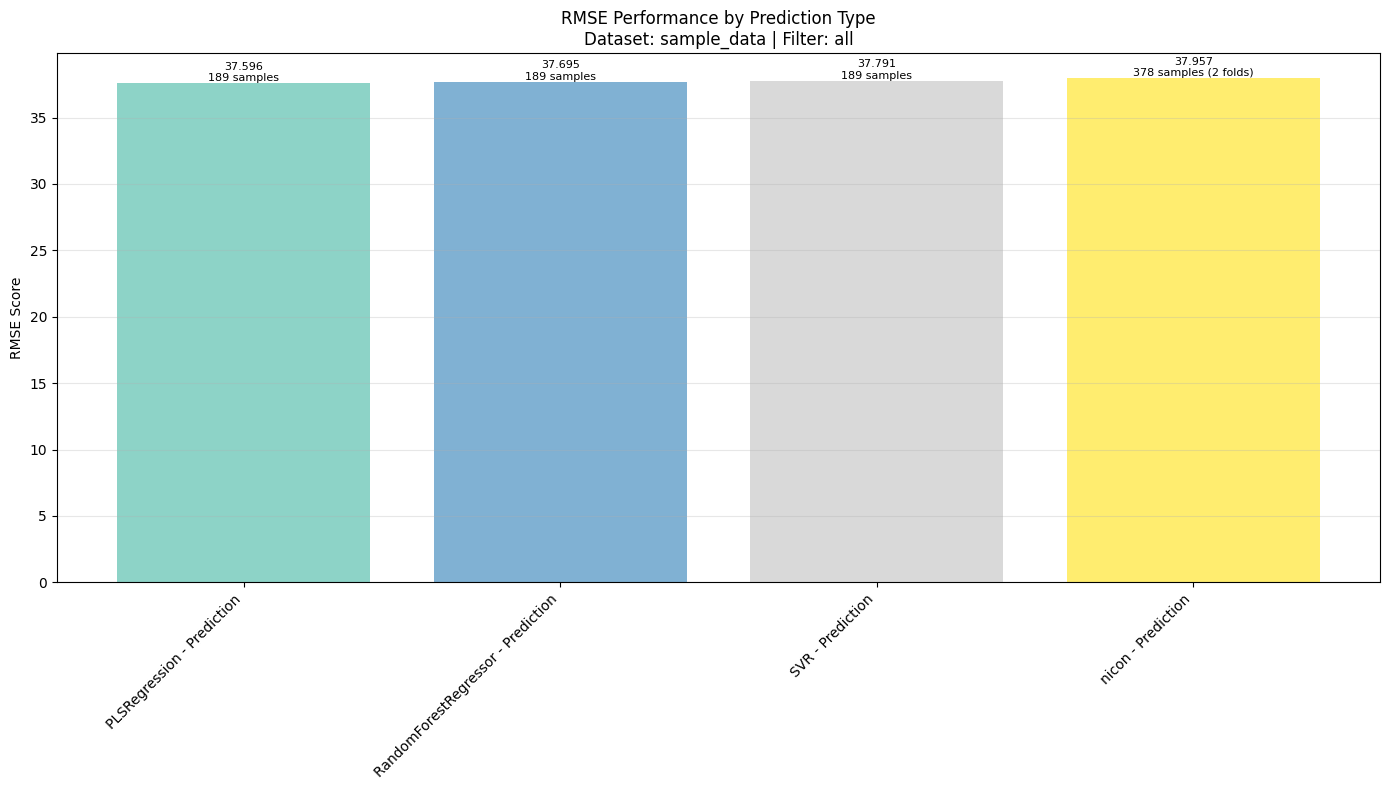


🏆 2. Best Predictions Only


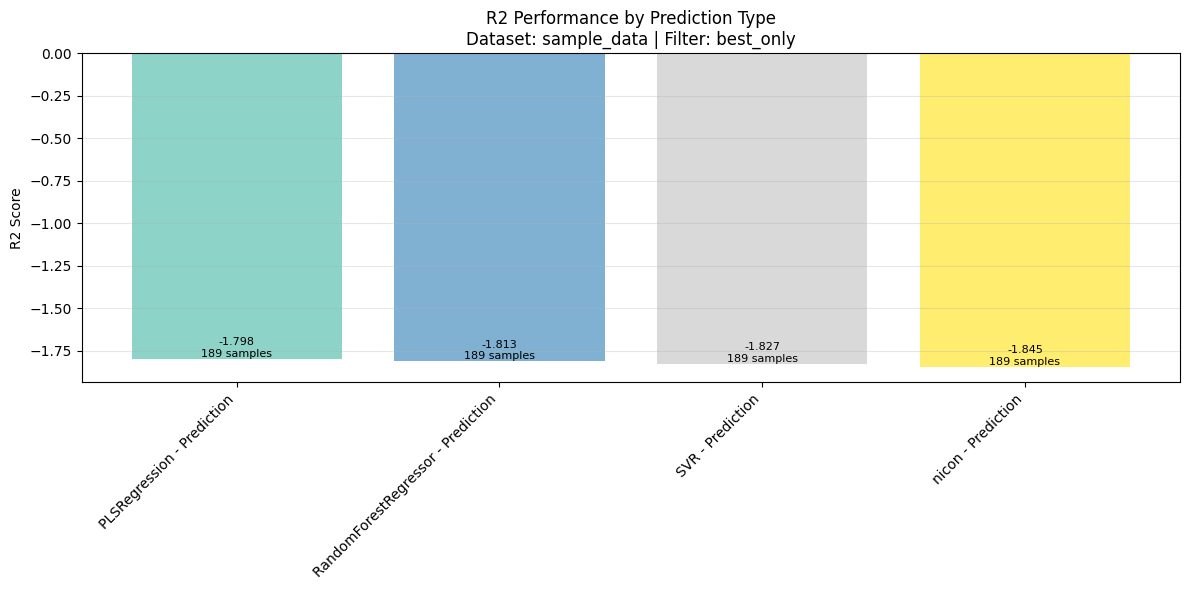


📈 3. Cross-Validation Folds Only


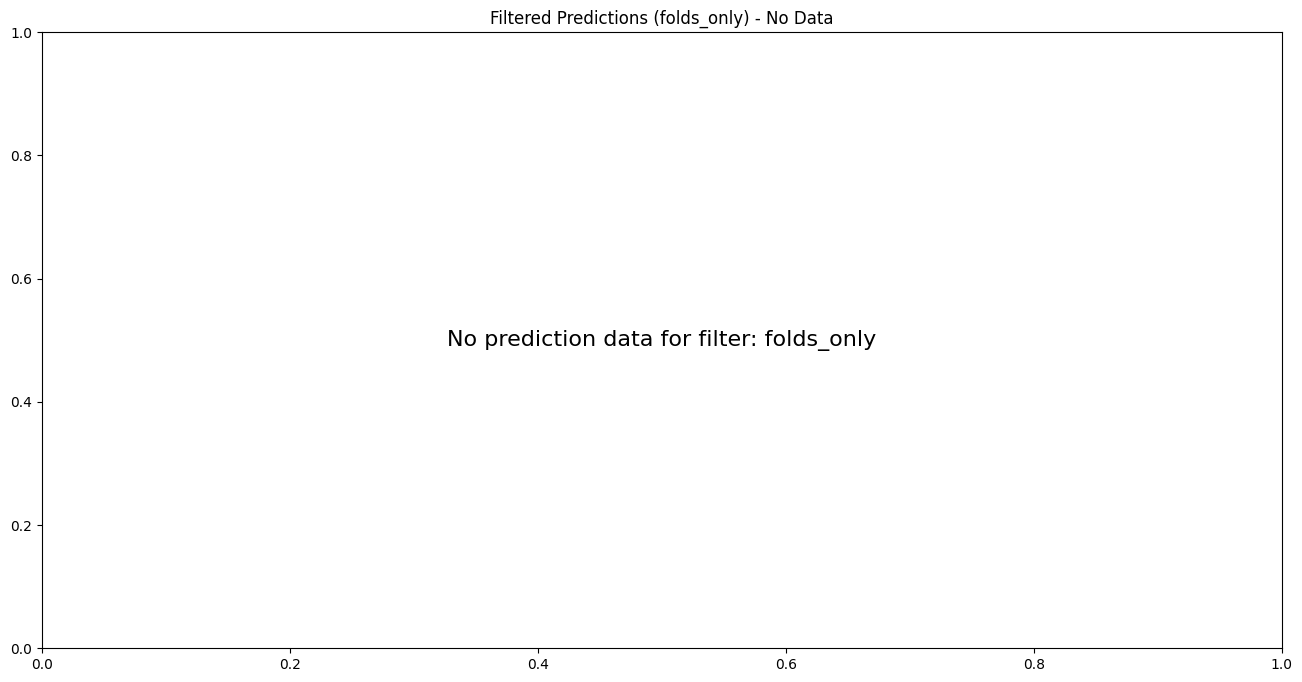


🔥 4. Performance Matrix - Global Predictions Only


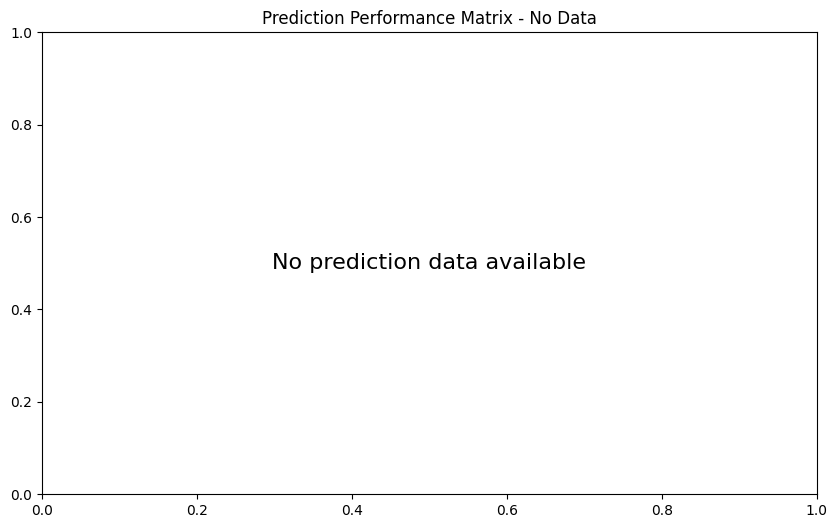

✅ All filtered visualizations completed successfully!


In [ ]:
# Test Filtering Visualizations
print("🎨 TESTING FILTERED VISUALIZATIONS")
print("=" * 50)

try:
    if 'viz_enhanced' in globals():
        # Test 1: Show all predictions as bar chart
        print("\n📊 1. All Predictions Bar Chart")
        fig1 = viz_enhanced.plot_filtered_predictions(
            prediction_filter='all',
            metric='rmse',
            chart_type='bar',
            figsize=(14, 8)
        )
        plt.show()

        # Test 2: Show only best predictions
        print("\n🏆 2. Best Predictions Only")
        fig2 = viz_enhanced.plot_filtered_predictions(
            prediction_filter='best_only',
            metric='r2',
            chart_type='bar',
            figsize=(12, 6)
        )
        plt.show()

        # Test 3: Show only fold predictions
        print("\n📈 3. Cross-Validation Folds Only")
        fig3 = viz_enhanced.plot_filtered_predictions(
            prediction_filter='folds_only',
            metric='rmse',
            chart_type='bar',
            figsize=(16, 8)
        )
        plt.show()

        # Test 4: Performance matrix with filtering
        print("\n🔥 4. Performance Matrix - Global Predictions Only")
        fig4 = viz_enhanced.plot_performance_matrix(
            metric='r2',
            prediction_filter='global_only',
            figsize=(10, 6),
            show_values=True
        )
        plt.show()

        print("✅ All filtered visualizations completed successfully!")

    else:
        print("❌ Enhanced visualizer not found. Run previous cell first!")

except Exception as e:
    print(f"❌ Error in filtered visualizations: {e}")
    import traceback
    traceback.print_exc()

In [ ]:
# Comprehensive Prediction Summary with Proper Dataset Names
print("📋 COMPREHENSIVE PREDICTION SUMMARY")
print("=" * 60)

try:
    if 'viz_enhanced' in globals():
        # Show comprehensive summary with fixed dataset names
        summary = viz_enhanced.comprehensive_prediction_summary()
        print(summary)

        # Show how the dataset name override works
        print(f"\n🏷️  Dataset Name Override: {viz_enhanced.dataset_name_override}")
        print(f"📊 Data Records: {len(viz_enhanced.data)}")

        # Demonstrate filtering examples
        print(f"\n🔍 FILTERING EXAMPLES:")
        print("=" * 30)

        filters_to_test = {
            'all': 'All prediction types',
            'best_only': 'Best performing prediction per model',
            'folds_only': 'Cross-validation fold predictions only',
            'averaged_only': 'Averaged predictions only',
            'global_only': 'Global train/test predictions only'
        }

        for filter_name, description in filters_to_test.items():
            filtered_count = len(viz_enhanced._filter_data_by_prediction_types(filter_name))
            print(f"• {filter_name:15} | {description:35} | {filtered_count:2} records")

        print(f"\n✅ Enhanced PredictionVisualizer ready with:")
        print(f"   🎯 Dataset name fixes (no more 'unknown')")
        print(f"   🔍 Filtering capabilities (5 filter types)")
        print(f"   📊 Enhanced visualization methods")
        print(f"   📈 Bar charts for prediction type comparison")

    else:
        print("❌ Enhanced visualizer not found. Run previous cell first!")

except Exception as e:
    print(f"❌ Error in comprehensive summary: {e}")
    import traceback
    traceback.print_exc()

📋 COMPREHENSIVE PREDICTION SUMMARY
🔍 COMPREHENSIVE PREDICTION SUMMARY

📊 Dataset: sample_data
────────────────────────────────────────

  🔧 Pipeline: unknown
  ───────────────────────────────────

    🤖 Base Model: RandomForestRegressor
    ──────────────────────────────

      📈 Prediction:
        ✅ 189 samples
        📊 RMSE: 37.6954, MAE: 30.7608
        📈 R²: -1.8128, MSE: 1420.9450

      ✅ Available: Prediction
      ⚠️  Missing: Average, Fold Test, Fold Train, Fold Val, Global Test, Global Train, Weighted Average

    🤖 Base Model: PLSRegression
    ──────────────────────────────

      📈 Prediction:
        ✅ 189 samples
        📊 RMSE: 37.5958, MAE: 30.7538
        📈 R²: -1.7980, MSE: 1413.4456

      ✅ Available: Prediction
      ⚠️  Missing: Average, Fold Test, Fold Train, Fold Val, Global Test, Global Train, Weighted Average

    🤖 Base Model: nicon
    ──────────────────────────────

      📈 Prediction:
        ✅ 2 instances:
          Instance None: 189 samples, RMSE=38.